In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' 
%matplotlib inline

In [3]:
# Import the housing data train and test set
train = pd.read_csv("C:/Users/notre/OneDrive/Documents/Data Science/Data@Rensselaer/regression/Linear Regression/Housing Prices/data/train.csv")
test  = pd.read_csv("C:/Users/notre/OneDrive/Documents/Data Science/Data@Rensselaer/regression/Linear Regression/Housing Prices/data/test.csv")

In [4]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [39]:
#Gives stats on the data set
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [40]:
# We know our dependent variable will be 'Sales Price' because this is what we are trying to predict
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

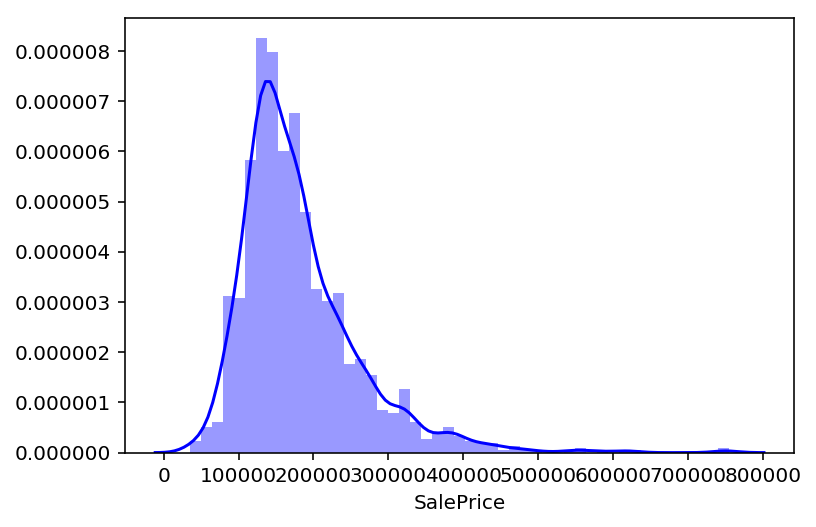

In [41]:
# We want to see how this data is distrubuted. We see the data is skewed.
sns.distplot((train['SalePrice']), color = 'b')

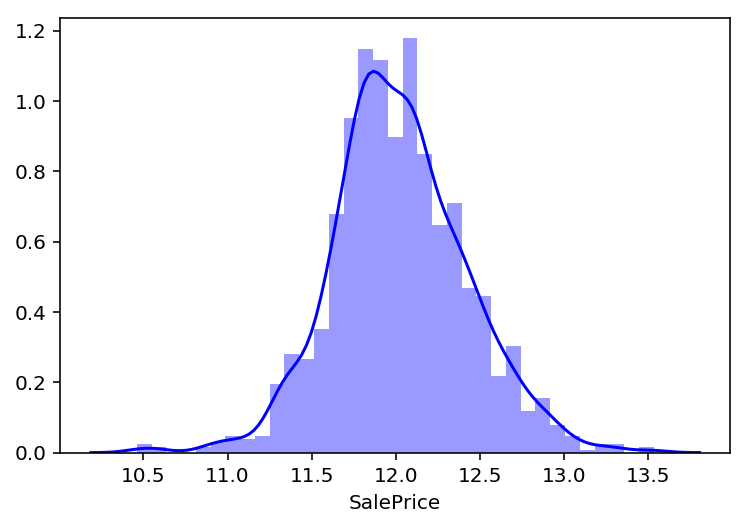

In [42]:
# We need to take the log in order normally distribute the data. 
sns.distplot(np.log(train['SalePrice']), color = 'b')

In [43]:
#Let's check if there are any missing values

missing = train.isnull().sum()
missing.sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [44]:
#dropping columns with 10% or more of missing values, while also dropping columns we assume could be linked to others
#this could simplify the model and eliminate useless columns
#we are eliminating the condition variables because we are going to make an assumption that the quality is much more important than condition


train = train.drop(['OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'Alley', 'ExterCond', 
                    'BsmtCond', 'GarageCond', 'GarageFinish', 'GarageYrBlt', 'GarageType', 'MasVnrType', 'MasVnrArea',
                    'Foundation', 'LotFrontage', 'MiscFeature', 'PoolQC', 'Fence', 'FireplaceQu', 'BsmtExposure',
                    'Id', 'BsmtFinType1', 'BsmtFinType2'], axis=1)

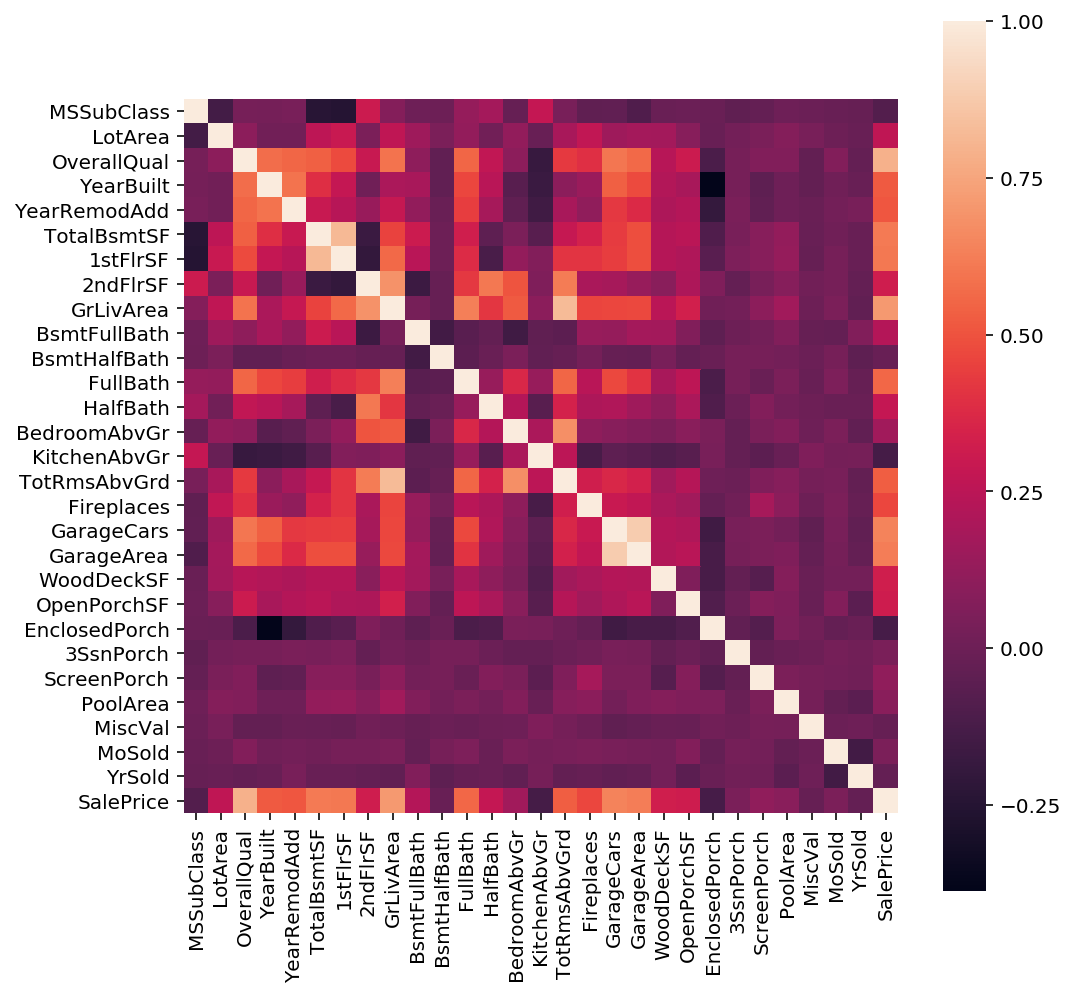

In [45]:
# We can see how each variable relates to each other (these are all numerical variables)
corrmat = train.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=1, square=True);

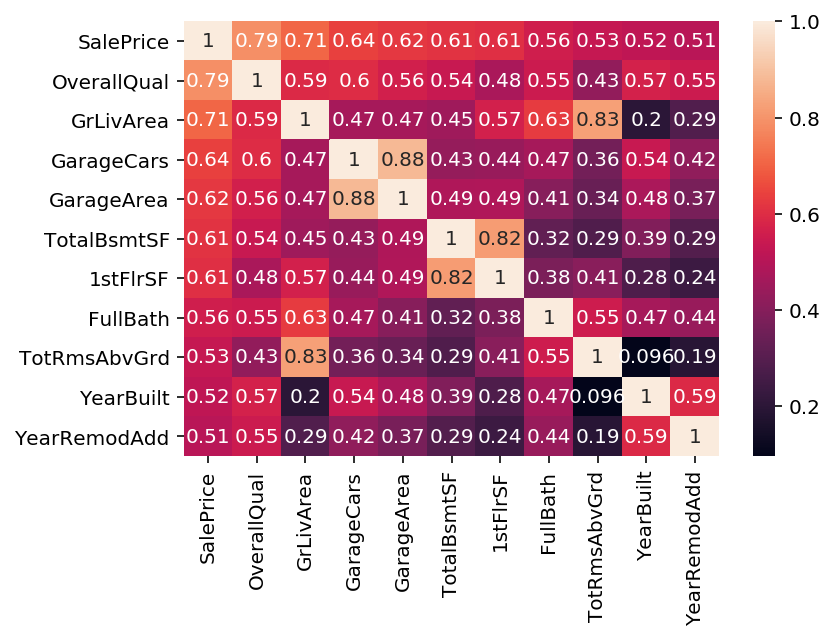

In [46]:
# We check to see which variables best correlate with SalePrice. It is decided here that we will view the variables that have 
# 50% of more correlation with our dependent variable
v = 11
cols = corrmat.nlargest(v, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [47]:
# In order to simplify our dataset even more, we decide the combine some features. For example, a good indicator of housing prices
# could be square feet. Instead of having multiple variables for square feet, we combine all of the square footage of the house.

train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF'] + train['WoodDeckSF'] + train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch']
train = train.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1)

In [48]:
# We do the same thing here as in the above feature creation. 
train["TotalFullBaths"] = train['BsmtFullBath'] + train['FullBath']
train["TotalHalfBaths"] = train['BsmtHalfBath'] + train['HalfBath']
train = train.drop(['BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath'], axis=1)
train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalFullBaths,TotalHalfBaths
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,2,2008,WD,Normal,208500,2627,3,1
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,5,2007,WD,Normal,181500,2822,2,1
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,9,2008,WD,Normal,223500,2748,3,1
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,2,2006,WD,Abnorml,140000,2780,2,0
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,12,2008,WD,Normal,250000,3619,3,1


In [49]:
# We drop categorical data that we think is either not adding value
train = train.drop(['Utilities', 'SaleType', 'Street', 'LandContour', 'LandSlope', 'Condition2', 
                    'RoofMatl', 'Heating', 'Electrical', 'Functional'], axis=1)

In [52]:
# Determining the mode of the BsmtQual so we can fill it in for missing values, since the missing data < 10%
train['BsmtQual'].describe()

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

In [53]:
# determining the mode of GarageQual so we can fill it in for missing values, since the missing data < 10%

train['GarageQual'].describe()

count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object

In [54]:
# Filling the NAs in the columns with the mode

train = train.fillna(train['BsmtQual'].value_counts().index[0])
train = train.fillna(train['GarageQual'].value_counts().index[0])

In [55]:
# Have we solved our missing data problem? Yes.
missingtrain = train.isnull().sum()
missingtrain.sort_values(ascending=False)

TotalHalfBaths    0
OverallQual       0
BsmtQual          0
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofStyle         0
YearRemodAdd      0
YearBuilt         0
HouseStyle        0
TotalFullBaths    0
BldgType          0
Condition1        0
Neighborhood      0
LotConfig         0
LotShape          0
LotArea           0
MSZoning          0
HeatingQC         0
CentralAir        0
GrLivArea         0
BedroomAbvGr      0
TotalSF           0
SalePrice         0
SaleCondition     0
YrSold            0
MoSold            0
MiscVal           0
PoolArea          0
PavedDrive        0
GarageQual        0
GarageArea        0
GarageCars        0
Fireplaces        0
TotRmsAbvGrd      0
KitchenQual       0
KitchenAbvGr      0
MSSubClass        0
dtype: int64

In [56]:
# For the rest of the categorical data we want to assign dummy variables in order to help the performance of our model
train = pd.get_dummies(train)

In [60]:
# We assign our independent variables and dependent variable to X, y
X = train.loc[:, train.columns != 'SalePrice']
y = train['SalePrice']

In [61]:
# import our train/test split model from sklearn
from sklearn.model_selection  import train_test_split

# Splitting data into a training set and a test set
# We use an 80/20 split here
X_train , X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                    test_size=0.2, random_state=10)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1168, 150) (292, 150) (1168,) (292,)


In [65]:
# Importing the Linear Regression Model
from sklearn.linear_model import LinearRegression

# Assign and fit our linear regression for our model
lm = LinearRegression()
lm.fit(X_train, y_train)

Y_Pred = lm.predict(X_test)

Text(0,0.5,'Predicted Prices')

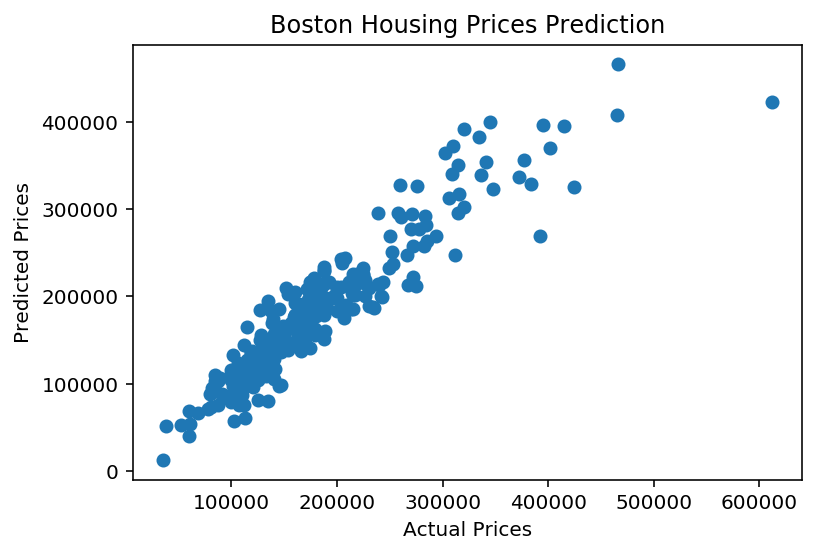

In [66]:
plt.scatter(y_test, Y_Pred)

# Labels of the scatter plot
plt.title('Housing Prices Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

In [73]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, Y_Pred)

print("R^2 Score: " + str(r2))

R^2 Score: 0.873837961085


At a glance, we can see that our model performed pretty well. Our R^2 score was at 0.87, meaning that our model was pretty
accurate in predicting housing prices. 

There are many other ways to manipulate this data in order to model it. In this example, the data was manipulated a decent amount, but it wasn't totally distorted. Certain actions, such as dropping data and feature creation, were decided on by the author. 